# Example of DOV search methods for boreholes (boringen)

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DOV-Vlaanderen/pydov/master?filepath=docs%2Fnotebooks%2Fsearch_boringen.ipynb)

## Use cases explained below
* Get observations in a bounding box
* Get observations with specific properties
* Get observations in a bounding box based on specific properties
* Select observations in a municipality and return depth
* Get boreholes based on fields not available in the standard output dataframe
* Get borehole data, returning fields not available in the standard output dataframe
* Get boreholes in a municipality and where groundwater related data are available

In [1]:
%matplotlib inline
import inspect, sys
import warnings; warnings.simplefilter('ignore')

In [2]:
# check pydov path
import pydov

## Get information about the datatype 'Boring'

In [3]:
from pydov.search.observatie import ObservatieSearch
observatie = ObservatieSearch()

A description is provided for the 'Observatie' datatype:

In [4]:
observatie.get_description()

'DIT IS EEN TEST'

The different fields that are available for objects of the 'Observatie' datatype can be requested with the get_fields() method:

In [5]:
fields = observatie.get_fields()

# print available fields
for f in fields.values():
    print(f['name'])

id
pkey_observatie
pkey_parent
parameter
parametergroep
observatietype
detectieconditie
resultaat
eenheid
fenomeentijd
resultaattijd
methode
uitvoerder
diepte_van_m
diepte_tot_m
herkomst
opmerking
opdracht
geom


You can get more information of a field by requesting it from the fields dictionary:
* *name*: name of the field
* *definition*: definition of this field
* *cost*: currently this is either 1 or 10, depending on the datasource of the field. It is an indication of the expected time it will take to retrieve this field in the output dataframe.
* *notnull*: whether the field is mandatory or not
* *type*: datatype of the values of this field

In [6]:
fields['diepte_van_m']

{'name': 'diepte_van_m',
 'definition': None,
 'type': 'float',
 'list': False,
 'notnull': False,
 'query': True,
 'cost': 1}

## Example use cases

### Get observations in a bounding box

Get data for all the observations that are geographically located within the bounds of the specified box.

The coordinates are in the Belgian Lambert72 (EPSG:31370) coordinate system and are given in the order of lower left x, lower left y, upper right x, upper right y.

In [7]:
from pydov.util.location import Within, Box

df = observatie.search(location=Within(Box(114000, 172310, 114005, 172315)))
df.head()

[000/001] .


pkey_observatie  \
0  https://oefen.dov.vlaanderen.be/data/observati...   
1  https://oefen.dov.vlaanderen.be/data/observati...   
2  https://oefen.dov.vlaanderen.be/data/observati...   
3  https://oefen.dov.vlaanderen.be/data/observati...   
4  https://oefen.dov.vlaanderen.be/data/observati...   

                                         pkey_parent fenomeentijd  \
0  https://oefen.dov.vlaanderen.be/data/monster/2...   2018-01-09   
1  https://oefen.dov.vlaanderen.be/data/monster/2...   2018-01-09   
2  https://oefen.dov.vlaanderen.be/data/monster/2...   2018-01-09   
3  https://oefen.dov.vlaanderen.be/data/monster/2...   2018-01-09   
4  https://oefen.dov.vlaanderen.be/data/monster/2...   2018-01-09   

   diepte_van_m  diepte_tot_m            parametergroep  \
0          4.50          4.75   Onderkenning-grondsoort   
1           NaN           NaN  Volumemassa-watergehalte   
2          4.75          5.00   Onderkenning-grondsoort   
3           NaN           NaN  Volumemassa-watergehalte   
4          7.50          8.00    Onderkenning - proeven   

                                           parameter  detectieconditie  \
0  Grondsoort volgens ASTM, de beschrijving (ASTM...               NaN   
1              Korrelvolumemassa (korrelvolumemassa)               NaN   
2      Grondsoort volgens GEO-BGGG (Grondsoort BGGG)               NaN   
3                        Watergehalte (watergehalte)               NaN   
4  Gehalte Kalkachtige stoffen (Gehalte Kalkachti...               NaN   

            resultaat eenheid                                  methode  \
0      Silt with sand     NaN                                 Onbekend   
1          2.65000000    ng/l                               Aangenomen   
2  kalkh. zandh. leem     NaN            Classificatie volgens de norm   
3         51.70000000       %  Gewichtsverlies na drogen in droogstoof   
4         19.10000000       %  Chemische reactie met waterstofchloride   

                  uitvoerder herkomst  
0  VO - Afdeling Geotechniek     LABO  
1  VO - Afdeling Geotechniek     LABO  
2  VO - Afdeling Geotechniek     LABO  
3  VO - Afdeling Geotechniek     LABO  
4  VO - Afdeling Geotechniek     LABO

The dataframe contains several observations made at the same location

Using the *pkey_observatie* field one can request the details of these obsevrations in a webbrowser:

In [8]:
for pkey_boring in set(df.pkey_observatie):
    print(pkey_boring)

https://oefen.dov.vlaanderen.be/data/observatie/2022-2761923
https://oefen.dov.vlaanderen.be/data/observatie/2022-1850256
https://oefen.dov.vlaanderen.be/data/observatie/2022-3489734
https://oefen.dov.vlaanderen.be/data/observatie/2022-1758836
https://oefen.dov.vlaanderen.be/data/observatie/2022-6538564
https://oefen.dov.vlaanderen.be/data/observatie/2023-7514595
https://oefen.dov.vlaanderen.be/data/observatie/2022-6447769
https://oefen.dov.vlaanderen.be/data/observatie/2022-1667272
https://oefen.dov.vlaanderen.be/data/observatie/2022-5857245
https://oefen.dov.vlaanderen.be/data/observatie/2022-6129664
https://oefen.dov.vlaanderen.be/data/observatie/2022-6766131
https://oefen.dov.vlaanderen.be/data/observatie/2022-6584164
https://oefen.dov.vlaanderen.be/data/observatie/2022-2807310
https://oefen.dov.vlaanderen.be/data/observatie/2022-5082175
https://oefen.dov.vlaanderen.be/data/observatie/2022-5447233
https://oefen.dov.vlaanderen.be/data/observatie/2022-3716919
https://oefen.dov.vlaand

### Get observations with specific properties

Next to querying observations based on their geographic location within a bounding box, we can also search for observations matching a specific set of properties. For this we can build a query using a combination of the 'Observatie' fields and operators provided by the WFS protocol.

A list of possible operators can be found below:

In [9]:
[i for i,j in inspect.getmembers(sys.modules['owslib.fes2'], inspect.isclass) if 'Property' in i]

['PropertyIsBetween',
 'PropertyIsEqualTo',
 'PropertyIsGreaterThan',
 'PropertyIsGreaterThanOrEqualTo',
 'PropertyIsLessThan',
 'PropertyIsLessThanOrEqualTo',
 'PropertyIsLike',
 'PropertyIsNotEqualTo',
 'PropertyIsNull',
 'SortProperty']

In this example we build a query using the *PropertyIsEqualTo* operator to find all observations concerning the parameter "Watergehalte (watergehalte)":

In [13]:
from owslib.fes2 import PropertyIsEqualTo

query = PropertyIsEqualTo(propertyname='parameter',
                          literal='Watergehalte (watergehalte)')
df = observatie.search(query=query)

df.head()

[000/001] .


pkey_observatie  \
0  https://oefen.dov.vlaanderen.be/data/observati...   
1  https://oefen.dov.vlaanderen.be/data/observati...   
2  https://oefen.dov.vlaanderen.be/data/observati...   
3  https://oefen.dov.vlaanderen.be/data/observati...   
4  https://oefen.dov.vlaanderen.be/data/observati...   

                                         pkey_parent fenomeentijd  \
0  https://oefen.dov.vlaanderen.be/data/monster/2...   2006-10-27   
1  https://oefen.dov.vlaanderen.be/data/monster/2...   2005-03-22   
2  https://oefen.dov.vlaanderen.be/data/monster/2...   2008-06-27   
3  https://oefen.dov.vlaanderen.be/data/monster/2...   2009-08-07   
4  https://oefen.dov.vlaanderen.be/data/monster/2...   2009-09-28   

   diepte_van_m  diepte_tot_m            parametergroep  \
0           NaN           NaN  Volumemassa-watergehalte   
1           NaN           NaN  Volumemassa-watergehalte   
2           NaN           NaN  Volumemassa-watergehalte   
3           NaN           NaN  Volumemassa-watergehalte   
4           NaN           NaN  Volumemassa-watergehalte   

                     parameter  detectieconditie    resultaat eenheid  \
0  Watergehalte (watergehalte)               NaN  20.60000000     NaN   
1  Watergehalte (watergehalte)               NaN  37.00000000     NaN   
2  Watergehalte (watergehalte)               NaN  40.00000000     NaN   
3  Watergehalte (watergehalte)               NaN  35.30000000     NaN   
4  Watergehalte (watergehalte)               NaN  23.30000000     NaN   

                                   methode                  uitvoerder  \
0  Gewichtsverlies na drogen in droogstoof   VO - Afdeling Geotechniek   
1  Gewichtsverlies na drogen in droogstoof  MVG - Afdeling Geotechniek   
2  Gewichtsverlies na drogen in droogstoof   VO - Afdeling Geotechniek   
3  Gewichtsverlies na drogen in droogstoof   VO - Afdeling Geotechniek   
4  Gewichtsverlies na drogen in droogstoof   VO - Afdeling Geotechniek   

  herkomst  
0     LABO  
1     LABO  
2     LABO  
3     LABO  
4     LABO

Once again we can use the *pkey_boring* as a permanent link to the information of these boreholes:

In [15]:
for pkey_observatie in set(df.pkey_observatie):
    print(pkey_observatie)

https://oefen.dov.vlaanderen.be/data/observatie/2022-4806268
https://oefen.dov.vlaanderen.be/data/observatie/2022-2133833
https://oefen.dov.vlaanderen.be/data/observatie/2022-7081689
https://oefen.dov.vlaanderen.be/data/observatie/2022-6081814
https://oefen.dov.vlaanderen.be/data/observatie/2022-1301177
https://oefen.dov.vlaanderen.be/data/observatie/2022-4395986
https://oefen.dov.vlaanderen.be/data/observatie/2022-2713158
https://oefen.dov.vlaanderen.be/data/observatie/2022-6581582
https://oefen.dov.vlaanderen.be/data/observatie/2022-5216665
https://oefen.dov.vlaanderen.be/data/observatie/2022-2439891
https://oefen.dov.vlaanderen.be/data/observatie/2022-6138701
https://oefen.dov.vlaanderen.be/data/observatie/2022-4806796
https://oefen.dov.vlaanderen.be/data/observatie/2022-1619411
https://oefen.dov.vlaanderen.be/data/observatie/2022-2121013
https://oefen.dov.vlaanderen.be/data/observatie/2022-1664690
https://oefen.dov.vlaanderen.be/data/observatie/2022-5763441
https://oefen.dov.vlaand

### Get observations in a bounding box based on specific properties

We can combine a query on attributes with a query on geographic location to get the observations within a bounding box that have specific properties.

The following example requests the observations where the parameter 'Watergehalte (watergehalte)' is greater than 30 and within the given bounding box.

(Note that the datatype of the *literal* parameter should be a string, regardless of the datatype of this field in the output dataframe.)

In [20]:
from owslib.fes2 import PropertyIsGreaterThanOrEqualTo, And

query = And([PropertyIsGreaterThanOrEqualTo(propertyname='resultaat',literal='30'),
            PropertyIsEqualTo(propertyname='parameter', literal='Watergehalte (watergehalte)')])

df = observatie.search(
    location=Within(Box(114000, 172310, 114005, 172315)),
    query=query
    )

df.head()

[000/001] .


pkey_observatie  \
0  https://oefen.dov.vlaanderen.be/data/observati...   
1  https://oefen.dov.vlaanderen.be/data/observati...   

                                         pkey_parent fenomeentijd  \
0  https://oefen.dov.vlaanderen.be/data/monster/2...   2018-01-09   
1  https://oefen.dov.vlaanderen.be/data/monster/2...   2018-01-09   

   diepte_van_m  diepte_tot_m            parametergroep  \
0           NaN           NaN  Volumemassa-watergehalte   
1           NaN           NaN  Volumemassa-watergehalte   

                     parameter  detectieconditie    resultaat eenheid  \
0  Watergehalte (watergehalte)               NaN  51.70000000       %   
1  Watergehalte (watergehalte)               NaN  36.30000000       %   

                                   methode                 uitvoerder herkomst  
0  Gewichtsverlies na drogen in droogstoof  VO - Afdeling Geotechniek     LABO  
1  Gewichtsverlies na drogen in droogstoof  VO - Afdeling Geotechniek     LABO

We can look at one of theobservations in a webbrowser using its *pkey_observatie*:

In [21]:
for pkey_observatie in set(df.pkey_observatie):
    print(pkey_observatie)

https://oefen.dov.vlaanderen.be/data/observatie/2022-2761922
https://oefen.dov.vlaanderen.be/data/observatie/2022-2533717


### Select observations with specific conditions and return pkey_parent

We can limit the columns in the output dataframe by specifying the *return_fields* parameter in our search.

In this example we query all the observations that have a value (resultaat) greater than 10 for parameter 'Watergehalte (watergehalte)' and	return its value (resultaat):

In [30]:
query = And([PropertyIsGreaterThanOrEqualTo(propertyname='resultaat',literal='10'),
            PropertyIsEqualTo(propertyname='parameter', literal='Watergehalte (watergehalte)')])
df = observatie.search(query=query,
                   return_fields=('resultaat',))
df.head()

[000/001] .


resultaat
0  20.60000000
1  37.00000000
2  40.00000000
3  35.30000000
4  23.30000000

In [27]:
df.describe()

resultaat
count          2903
unique          889
top     30.60000000
freq             24

By discarding the boreholes with a resultaat less than 50, we get a different result:

In [36]:
df[df.resultaat.astype(float) < 50.0].describe()

resultaat
count          7025
unique          800
top     24.80000000
freq             57

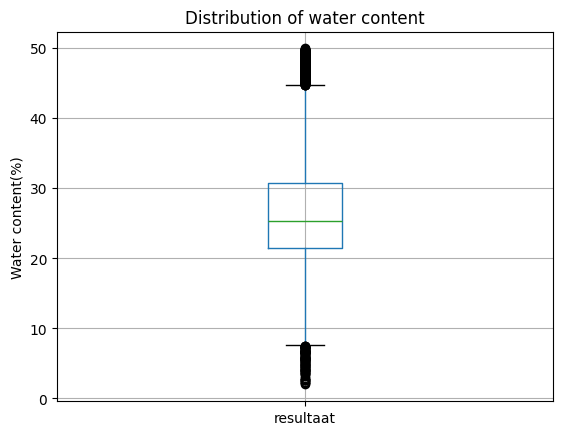

In [37]:
ax = df[df.resultaat.astype(float) < 50.0].astype(float).boxplot()
ax.set_ylabel("Water content(%)");
ax.set_title("Distribution of water content");

### Get observations based on fields not available in the standard output dataframe

To keep the output dataframe size acceptable, not all available WFS fields are included in the standard output. However, one can use this information to select observations as illustrated below.

For example, make a selection of the observations that have an 'opdracht':

In [48]:
from owslib.fes2 import Not
from owslib.fes2 import PropertyIsNull

query = Not([PropertyIsNull(propertyname='opdracht')])

df = observatie.search(query=query, max_features = 100,
                   return_fields=('pkey_observatie', 'opdracht'))
df.head()

[000/001] .


pkey_observatie  \
0  https://oefen.dov.vlaanderen.be/data/observati...   
1  https://oefen.dov.vlaanderen.be/data/observati...   
2  https://oefen.dov.vlaanderen.be/data/observati...   
3  https://oefen.dov.vlaanderen.be/data/observati...   
4  https://oefen.dov.vlaanderen.be/data/observati...   

                                            opdracht  
0  |Curieuzeneuzen in de tuin 2021|Curieuzeneuzen...  
1  |Curieuzeneuzen in de tuin 2021|Curieuzeneuzen...  
2  |Curieuzeneuzen in de tuin|Curieuzeneuzen in d...  
3  |Curieuzeneuzen in de tuin|Curieuzeneuzen in d...  
4  |Curieuzeneuzen in de tuin|Curieuzeneuzen in d...

## Visualize results

Using Geopandas GeoDataFrame, we can easily display the results of our search on a map.

In [57]:
import geopandas as gpd

query = And([PropertyIsGreaterThanOrEqualTo(propertyname='resultaat',literal='10'),
            PropertyIsEqualTo(propertyname='parameter', literal='Watergehalte (watergehalte)')])
df = observatie.search(query=query,
                   return_fields=('pkey_observatie','resultaat','geom'))

[000/001] .


In [65]:
gdf = gpd.GeoDataFrame(df, geometry='geom', crs='EPSG:31370')
gdf.explore()